In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2a-data"

In [2]:
install.packages("car")
install.packages("lmtest")
install.packages("corrplot")
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”


# **UE22CS342AA2- Data Analytics - Worksheet 2a - Simple Linear and Multiple Linear Regression**

Sanjana S - sanjanasuresh2709@gmail.com

**Academic Excellence Analysis Task**

In today's competitive educational landscape, understanding the factors that contribute to student success is more important than ever. Educators and policymakers are constantly seeking ways to enhance learning outcomes and support students in achieving their full potential. By analyzing various elements that influence academic performance, we can uncover valuable insights and develop effective strategies to improve educational practices.

Your task is to analyze the dataset to uncover the factors influencing academic success. By examining various predictors and their impact on the performance index, you can provide valuable insights that can help educators and students optimize learning strategies.

## Regression

Regression is a statistical method used to model the connection between variables, understanding how changes in one influence another. It's vital for predicting outcomes, finding patterns, and making informed decisions. 

In this worksheet we will be exploring 2 concepts. Namely:

  - Simple Linear Regression
  
  - Multiple Linear Regression
  
 

Before we go any further, let's have a look at the dataset and it's different columns

**Data Dictionary**

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
* Learning Hours: The total number of hours spent studying by each student.
* Previous Exam Scores: The scores obtained by students in previous exams.
* Club Participation: Whether the student participates in any club activities (Yes or No).
* Daily Rest Hours: The average number of hours of sleep the student had per day.
* Practice Tests Taken: The number of sample question papers the student practiced.

Target Variable:
* Academic Performance Index: A measure of the overall performance of each student.It represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


## Data Visualising

Let's visualize this all in the form of a Data Frame

In [5]:
data <- read.csv("/kaggle/input/2a-data/2a-data.csv")
head(data)

,Learning_Hours,Previous_Exam_Scores,Club_Participation,Daily_Rest_Hours,Practice_Tests_Taken,Academic_Performance_Score
,<int>,<int>,<chr>,<int>,<int>,<int>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [6]:
summary(data)

 Learning_Hours  Previous_Exam_Scores Club_Participation Daily_Rest_Hours
 Min.   :1.000   Min.   :40.00        Length:10000       Min.   :4.000   
 1st Qu.:3.000   1st Qu.:54.00        Class :character   1st Qu.:5.000   
 Median :5.000   Median :69.00        Mode  :character   Median :7.000   
 Mean   :4.993   Mean   :69.45                           Mean   :6.531   
 3rd Qu.:7.000   3rd Qu.:85.00                           3rd Qu.:8.000   
 Max.   :9.000   Max.   :99.00                           Max.   :9.000   
 Practice_Tests_Taken Academic_Performance_Score
 Min.   :0.000        Min.   : 10.00            
 1st Qu.:2.000        1st Qu.: 40.00            
 Median :5.000        Median : 55.00            
 Mean   :4.583        Mean   : 55.22            
 3rd Qu.:7.000        3rd Qu.: 71.00            
 Max.   :9.000        Max.   :100.00            

## Regression Analysis


### 1. Simple Linear Regression

Educators want to know if previous academic performance is often a strong indicator of future academic success.<br> <br>
**a)** Create a scatter plot between the dependent variable-Previous_Exam_Score and independent variable-Academic_Performance_Score with the best-fit line passing through.            (1 mark)

In [7]:
colnames(data)

[1] "Learning_Hours"             "Previous_Exam_Scores"      
[3] "Club_Participation"         "Daily_Rest_Hours"          
[5] "Practice_Tests_Taken"       "Academic_Performance_Score"

`geom_smooth()` using formula = 'y ~ x'


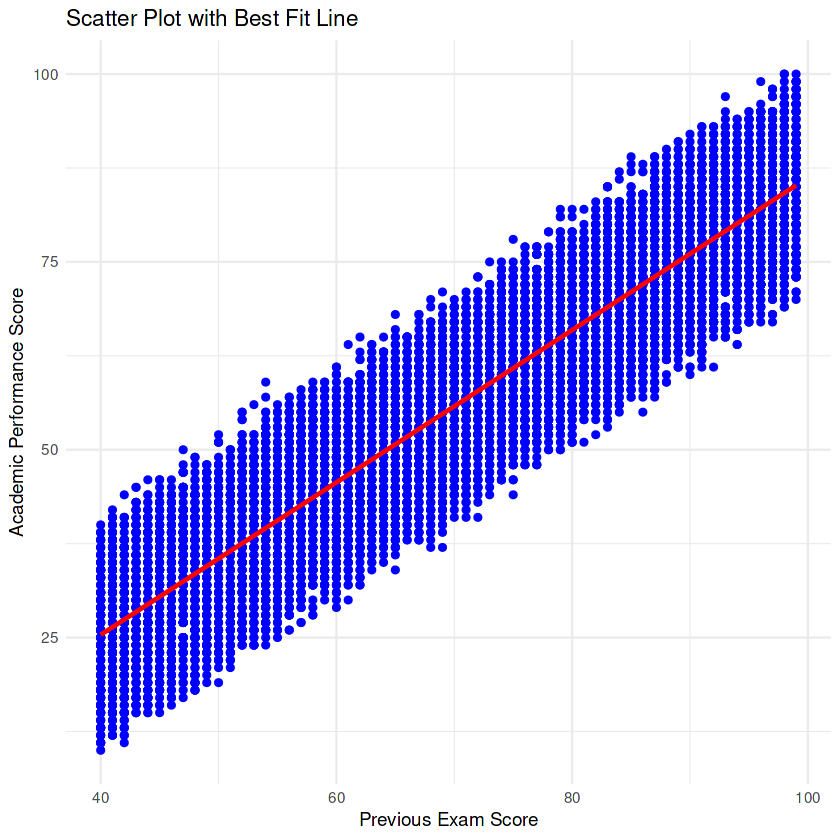

In [8]:
# Load necessary libraries
library(ggplot2)

# Assuming your dataset is already loaded into a dataframe called 'data'
# Create scatter plot with best-fit line
ggplot(data, aes(x = `Previous_Exam_Scores`, y = `Academic_Performance_Score`)) +
  geom_point(color = "blue") +  # Scatter plot points
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Best fit line
  labs(title = "Scatter Plot with Best Fit Line",
       x = "Previous Exam Score",
       y = "Academic Performance Score") +
  theme_minimal()


The upward inclination of the points indicate positive correlation (as previous exam score increases, the academic performance score increases). The points are tightly clustered indicating a strong and linear relationship

We observe the closeness of the data instances implying there are less number of outliers . Also a positive dependence of the academic performance on previous test reults . Which means there exist a positive correlation.

What do you infer from the graph?             

**b)** Build a linear regression model to predict performance index based on previous scores  (1 mark).

In [10]:
model <- lm(`Academic_Performance_Score` ~ `Previous_Exam_Scores`, data = data)

**c)** Check if this model follows OLS assumptions.              (3 marks)


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




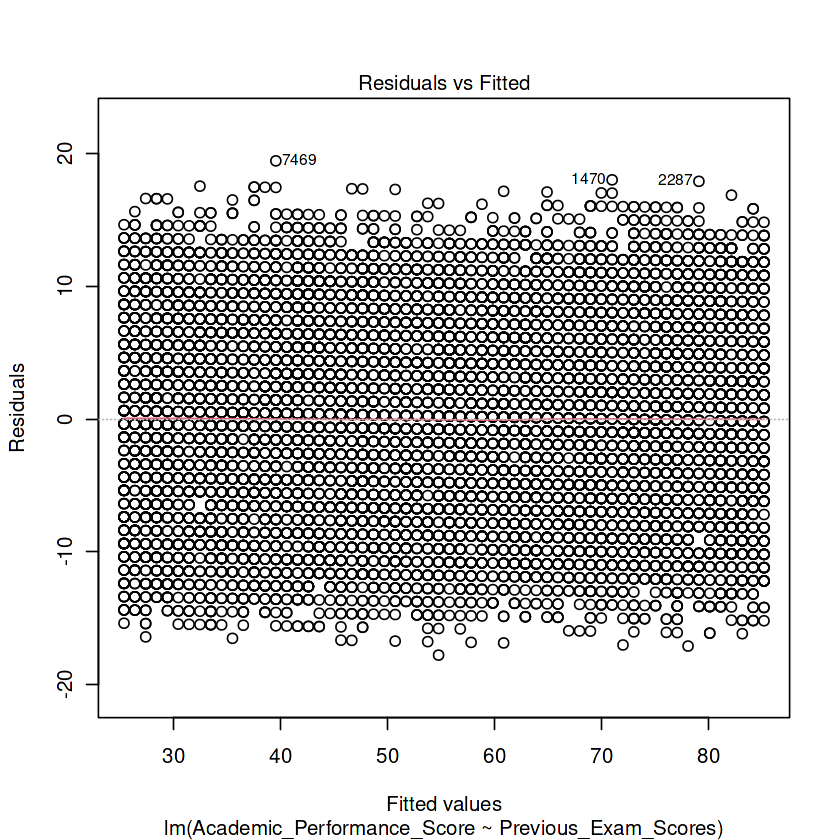

In [11]:
library(ggplot2)
library(car)

plot(model, which = 1)  # Residuals vs Fitted plot

residuals vs fitted values plot shows homoscedasticity

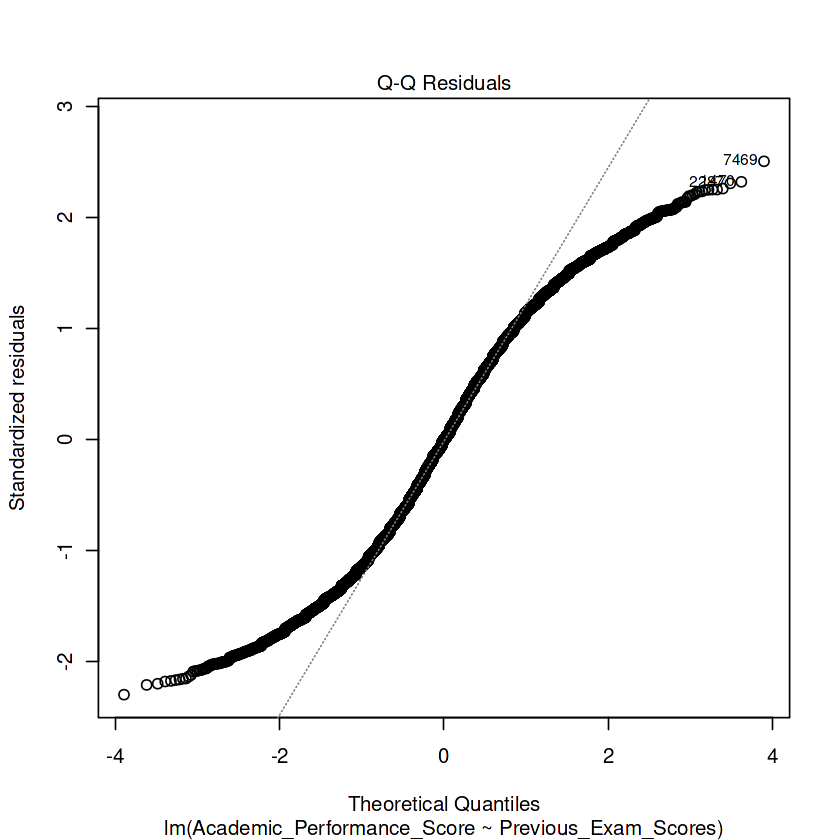

In [12]:
plot(model, which = 2)  # Q-Q plot of residuals

In [13]:
library(lmtest)
bptest(model)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model
BP = 1.8448, df = 1, p-value = 0.1744


In [14]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1     -0.01334696      2.026609   0.194
 Alternative hypothesis: rho != 0

Does the model follow OLS assumptions?          
How did you evaluate whether the linear regression model meets the assumptions required for Ordinary Least Squares (OLS) estimation?
                  


**d)** SLR Validation:                          (1 mark) <br>
Evaluate the overall goodness-of-fit of the linear regression model.
Test whether the overall model is statistically significant using F-statistic.Mention the null and alternative hypotheses.

In [15]:
summary(model)


Call:
lm(formula = Academic_Performance_Score ~ Previous_Exam_Scores, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -15.181799   0.319605   -47.5   <2e-16 ***
Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


multiple R-squared: 0.8376
This value shows that 83.76% of the variance in the dependent variable (performance index) is explained by the independent variable (previous exam score). This is a strong indicator that the model fits the data well.

F-statistic: 5.156e+04
The F-statistic tests the overall significance of the model. A large F-statistic like 51,560 indicates that the model explains a significant amount of the variance in the dependent variable.

The extremely small p-value (< 0.001) indicates that the model is highly statistically significant, meaning there is strong evidence to reject the null hypothesis. This suggests that previous exam score is a significant predictor of performance index.

The null and alternative hypothesis considered:
Null Hypothesis (H₀): The overall model is not statistically significant (i.e., all the regression coefficients, except the intercept, are zero).
Alternative Hypothesis (H₁): The overall model is statistically significant (i.e., at least one of the regression coefficients is different from zero).

### 2. Multiple Linear Regression                        (4 marks)

For our Multiple Linear Regression models, we could use all the attributes and try to predict the target variable. But the aim is to always predict the maximum variation in the target, with the minimum variables.

Thus, it's important to identify which features are most important to predict our target variable. Use the help of a correlogram to visually analyze the correlation between different independent variables and the one dependent variable. 



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.94 loaded



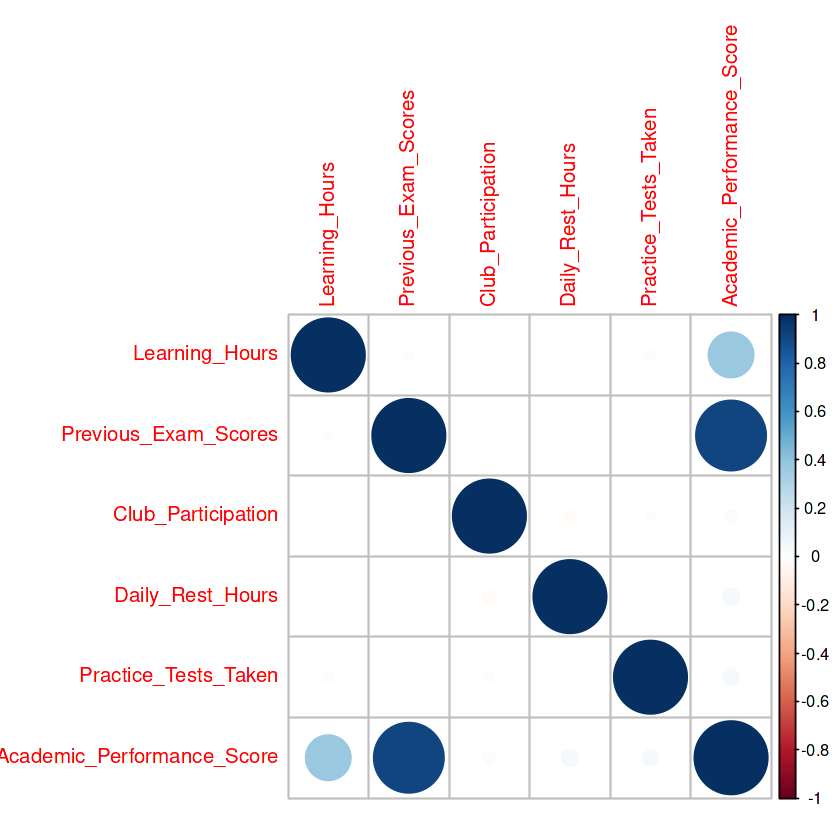

In [16]:
## Before constructing a correlogram, you will have to convert all categorical values to numerical values (Club_Participation column)
library(Hmisc)
library(corrplot)
data$Club_Participation <- as.factor(data$Club_Participation)

# Convert factor to numeric (label encoding)
data$Club_Participation <- as.numeric(data$Club_Participation)
# Calculate correlation matrix
correlation_matrix <- cor(data, use = "complete.obs")

# Using Hmisc to get correlation and p-values
cor_results <- rcorr(as.matrix(data))
correlation_matrix <- cor_results$r  # Correlation matrix
p_values <- cor_results$P  # P-values matrix (optional)

# Simple correlogram
corrplot(correlation_matrix, method = "circle")


## Then proceed to create the correlogram


**1**) Use different variables to create the Multiple Linear Regression model. <br>

In [17]:
model_mlr <- lm(Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores + Practice_Tests_Taken, data = data)

# Summary of the model to check coefficients, R-squared, and significance
summary(model_mlr)



Call:
lm(formula = Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores + 
    Practice_Tests_Taken, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0935 -1.4517 -0.0356  1.4861  8.7801 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -30.679174   0.106838 -287.15   <2e-16 ***
Learning_Hours         2.853819   0.008551  333.74   <2e-16 ***
Previous_Exam_Scores   1.018860   0.001276  798.17   <2e-16 ***
Practice_Tests_Taken   0.196303   0.007721   25.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.213 on 9996 degrees of freedom
Multiple R-squared:  0.9867,	Adjusted R-squared:  0.9867 
F-statistic: 2.478e+05 on 3 and 9996 DF,  p-value: < 2.2e-16


In [18]:
cor(data)

,Learning_Hours,Previous_Exam_Scores,Club_Participation,Daily_Rest_Hours,Practice_Tests_Taken,Academic_Performance_Score
Learning_Hours,1.000000000,-0.012389916,0.003872541,0.001245198,0.017463168,0.37373035
Previous_Exam_Scores,-0.012389916,1.000000000,0.008369320,0.005944219,0.007888025,0.91518914
Club_Participation,0.003872541,0.008369320,1.000000000,-0.023283644,0.013102781,0.02452495
Daily_Rest_Hours,0.001245198,0.005944219,-0.023283644,1.000000000,0.003990220,0.04810584
Practice_Tests_Taken,0.017463168,0.007888025,0.013102781,0.003990220,1.000000000,0.04326833
Academic_Performance_Score,0.373730351,0.915189141,0.024524947,0.048105835,0.043268327,1.00000000


Is there any correlation between independent variables.Why it is important to do this?

Which are the most important variables to predict the Performance Index?



So as we see the correlation between the independent variables is very low .
Now identifying correlation between independent variables is very important to identify and remove autocorrelation and identify any hidden variables.
This become very important cause not only do they reduce unecessary complexity of the model but provide better fit model .

**Good job with the analysis!**